In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# load data set
df = pd.read_csv('data_sample.csv')

In [32]:
df.head(10)

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1
5,1955,6,Chrysler,2071.6,18.5
6,1955,7,Armour,2056.1,1.6
7,1955,8,Gulf Oil,1705.3,182.8
8,1955,9,Mobil,1703.6,183.8
9,1955,10,DuPont,1687.7,344.4


In [33]:
df.tail(2)

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
25498,2005,499,Kindred Healthcare,3616.6,70.6
25499,2005,500,Cincinnati Financial,3614.0,584


In [34]:
df.columns = ['year', 'rank', 'company', 'revenue', 'profit']

In [35]:
len(df)

25500

In [36]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

In [37]:
non_numberic_profits = df.profit.str.contains('[^0-9.-]')
df.loc[non_numberic_profits].head()

,year,rank,company,revenue,profit
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.


In [38]:
set(df.profit[non_numberic_profits])

{'N.A.'}

In [39]:
len(df.profit[non_numberic_profits])

369

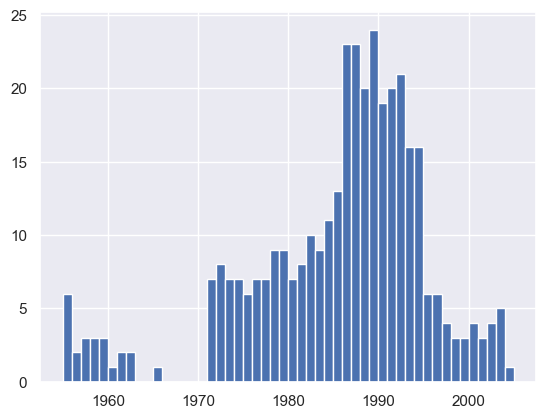

In [40]:
bin_sizes, _, _ = plt.hist(df.year[non_numberic_profits], bins=range(1955, 2006))

In [41]:
df = df.loc[~non_numberic_profits]
df.profit = df.profit.apply(pd.to_numeric)
len(df)

25131

In [42]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

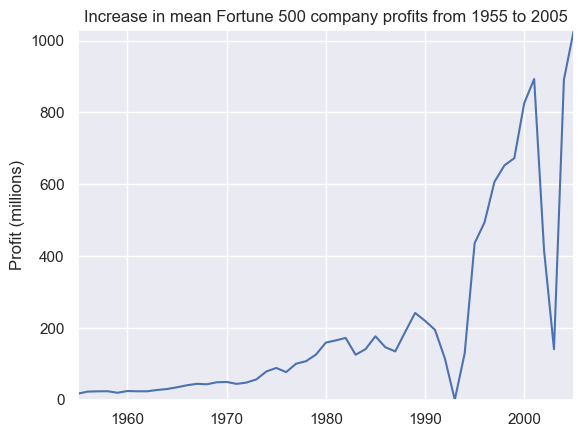

In [43]:
group_by_year = df.loc[:, ['year', 'revenue', 'profit']].groupby('year')
avgs = group_by_year.mean()
x = avgs.index
y1 = avgs.profit

def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)
    
fig, ax = plt.subplots()
plot(x, y1, ax, 'Increase in mean Fortune 500 company profits from 1955 to 2005', 'Profit (millions)')

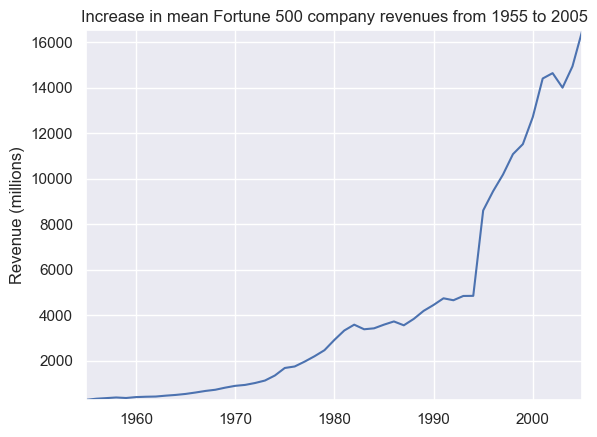

In [44]:
y2 = avgs.revenue
fig, ax = plt.subplots()
plot(x, y2, ax, 'Increase in mean Fortune 500 company revenues from 1955 to 2005', 'Revenue (millions)')

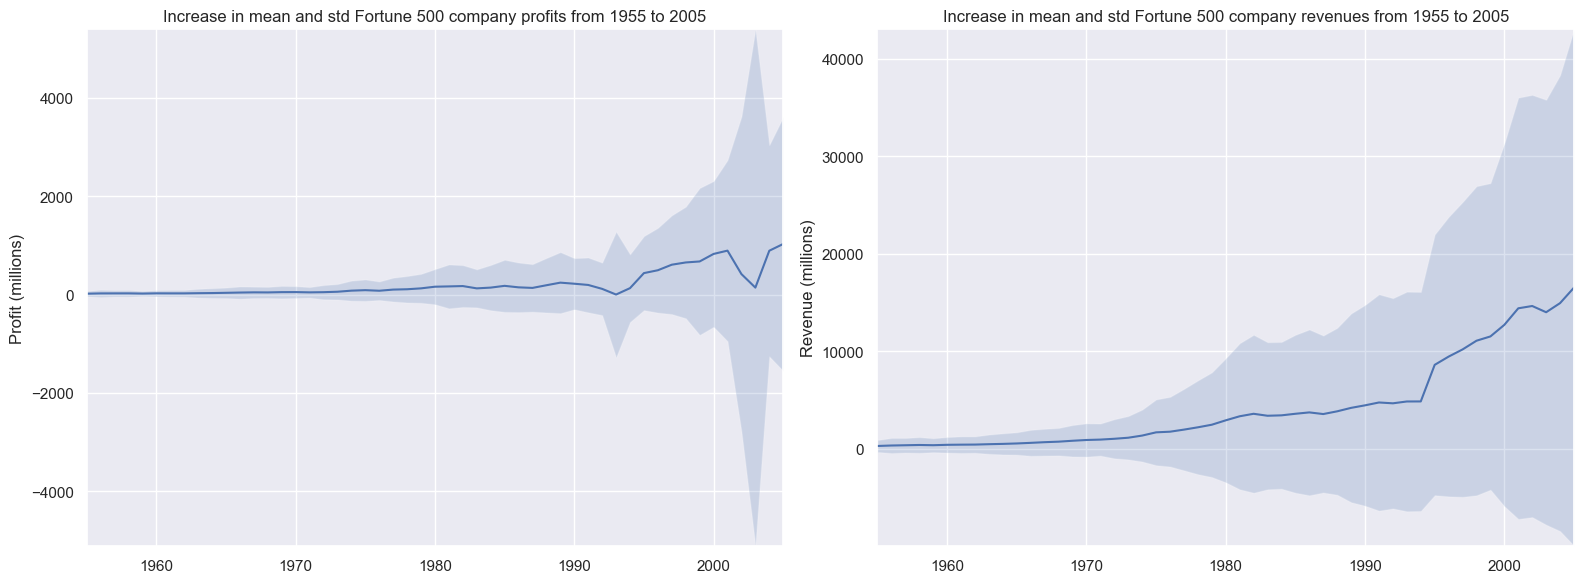

In [45]:
def plot_with_std(x, y, stds, ax, title, y_label):
    ax.fill_between(x, y - stds, y + stds, alpha=0.2)
    plot(x, y, ax, title, y_label)
fig, (ax1, ax2) = plt.subplots(ncols=2)
title = 'Increase in mean and std Fortune 500 company %s from 1955 to 2005'
stds1 = group_by_year.std().profit.values
stds2 = group_by_year.std().revenue.values
plot_with_std(x, y1.values, stds1, ax1, title % 'profits', 'Profit (millions)')
plot_with_std(x, y2.values, stds2, ax2, title % 'revenues', 'Revenue (millions)')
fig.set_size_inches(16, 6)
fig.tight_layout()